<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 전국 아파트 평균 매매가격

<img src='https://raw.githubusercontent.com/Jangrae/img/master/apart.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 apart 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/apart_price.csv
- 단축 경로: 'https://bit.ly/ApartFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 읽어옵니다.

In [128]:
# 데이터 읽어오기
path='https://bit.ly/ApartFile'
apt = pd.read_csv(path,encoding='CP949')
apt

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [129]:
# 상위 5개 행 확인
apt.head()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


In [130]:
# 하위 5개 행 확인
apt.tail()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400
186,제주,서귀포시,223087,222696,222196,221685,221457,221500,222043,222913,223370,224065,224913,231457


**2) 열 데이터 형식, 값 개수 확인**

- 어떤 열이 있고, 맻 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [131]:
# 열 정보 확인
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역1      187 non-null    object
 1   지역2      187 non-null    object
 2   2020-08  187 non-null    int64 
 3   2020-09  187 non-null    int64 
 4   2020-10  187 non-null    int64 
 5   2020-11  187 non-null    int64 
 6   2020-12  187 non-null    int64 
 7   2021-01  187 non-null    int64 
 8   2021-02  187 non-null    int64 
 9   2021-03  187 non-null    int64 
 10  2021-04  187 non-null    int64 
 11  2021-05  187 non-null    int64 
 12  2021-06  187 non-null    int64 
 13  2021-07  187 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 20.6+ KB


**3) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [132]:
# 결측치 확인
apt.isna().sum()

지역1        0
지역2        0
2020-08    0
2020-09    0
2020-10    0
2020-11    0
2020-12    0
2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
2021-06    0
2021-07    0
dtype: int64

## 3.데이터 전처리
전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 열 이름 변경**

- 지역1, 지역2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [133]:
# 열 이름 변경
name = {'지역1':'시도','지역2':'구군' }
apt.rename(columns=name,inplace=True)
# 확인
apt

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400


**2) 열 추가**

- 다음 공식을 사용해 '증가액', '증가율' 열을 추가합니다.

    - 증가액: 2021년 7월 가격 - 2020년 8월 가격
    - 증가율: (2021년 7월 가격 - 2020년 8월 가격) * 100 / 2020년 8월 가격

In [134]:
# 연간 증가액
apt['증가액'] = apt['2021-07']-apt['2020-08']

# 연간 증가율
apt['증가율'] = (apt['2021-07']-apt['2020-08'])*100/apt['2020-08']

# 확인
apt

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750,21208,2.059945
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486,27229,3.394050
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073,45719,3.267150
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157,36441,4.001357
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805,42768,4.188683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125,2670,2.111423
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079,5805,3.738552
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215,31641,18.334743
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400,40529,13.337568


**3) 불필요한 열 제거**

- 시도, 구군, 증가액, 증가율 열만 추출하여 apart2 데이터프레임을 선언합니다.
- 이후 모든 작업은 apart2 데이터프레임을 대상으로 합니다.

In [135]:
# 분석 대상 열 지정
col=['시도','구군','증가액','증가율']
apart2 = apt.loc[:,col]

# 확인
apart2

,시도,구군,증가액,증가율
0,서울,종로구,21208,2.059945
1,서울,중구,27229,3.394050
2,서울,용산구,45719,3.267150
3,서울,성동구,36441,4.001357
4,서울,광진구,42768,4.188683
...,...,...,...,...
182,경남,밀양시,2670,2.111423
183,경남,거제시,5805,3.738552
184,경남,양산시,31641,18.334743
185,제주,제주시,40529,13.337568


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

### 4.1.전국 분석

**1) 가격 변동 현황**

- 구군의 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

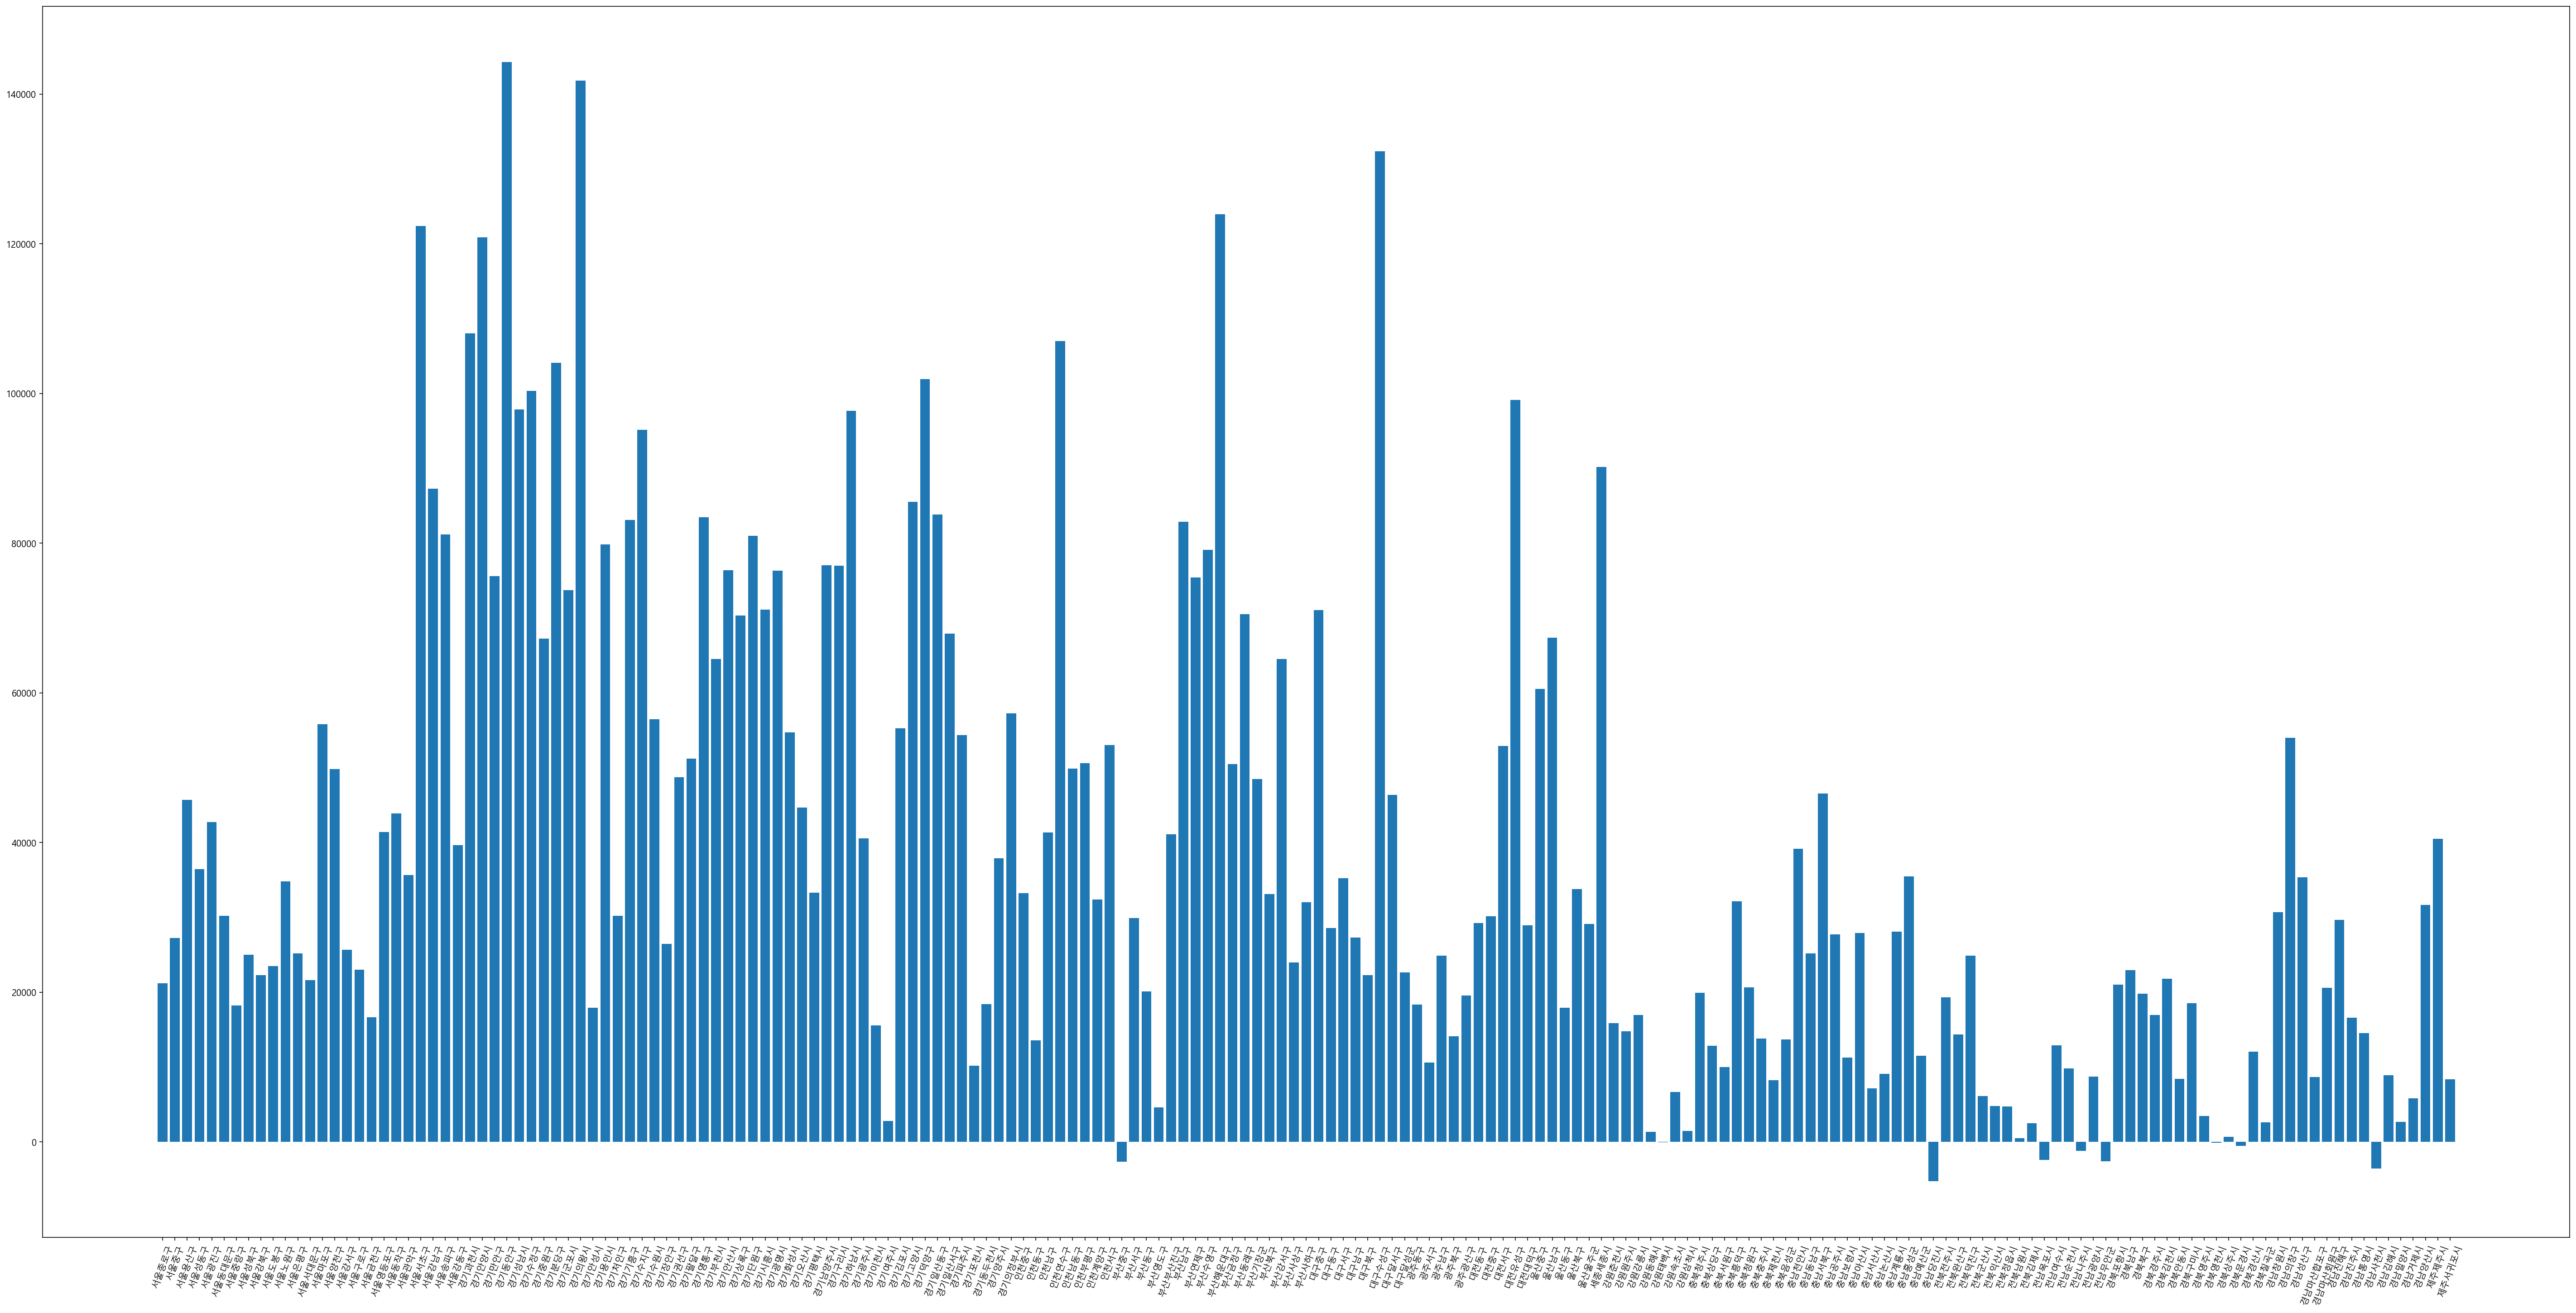

In [136]:
# 차트 그리기
plt.figure(figsize=(50, 25))
plt.bar(apart2['시도']+apart2['구군'],apart2['증가액'])
plt.xticks(rotation=70)
plt.show()





**2) 가격 변동 TOP 25**

- 증가액 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [137]:
# 가격 변동 TOP 25
tmp = apart2.sort_values(by='증가액',ascending=False).head(25)
tmp.reset_index(drop=True,inplace=True)
# 확인
tmp

,시도,구군,증가액,증가율
0,경기,동안구,144265,25.019033
1,경기,의왕시,141787,28.618515
2,대구,수성구,132345,25.655664
3,부산,해운대구,123977,30.789194
4,서울,서초구,122376,6.988865
5,경기,안양시,120878,22.304477
6,경기,과천시,108063,8.575013
7,인천,연수구,107033,23.328647
8,경기,분당구,104115,11.234421
9,경기,덕양구,101934,26.441543


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

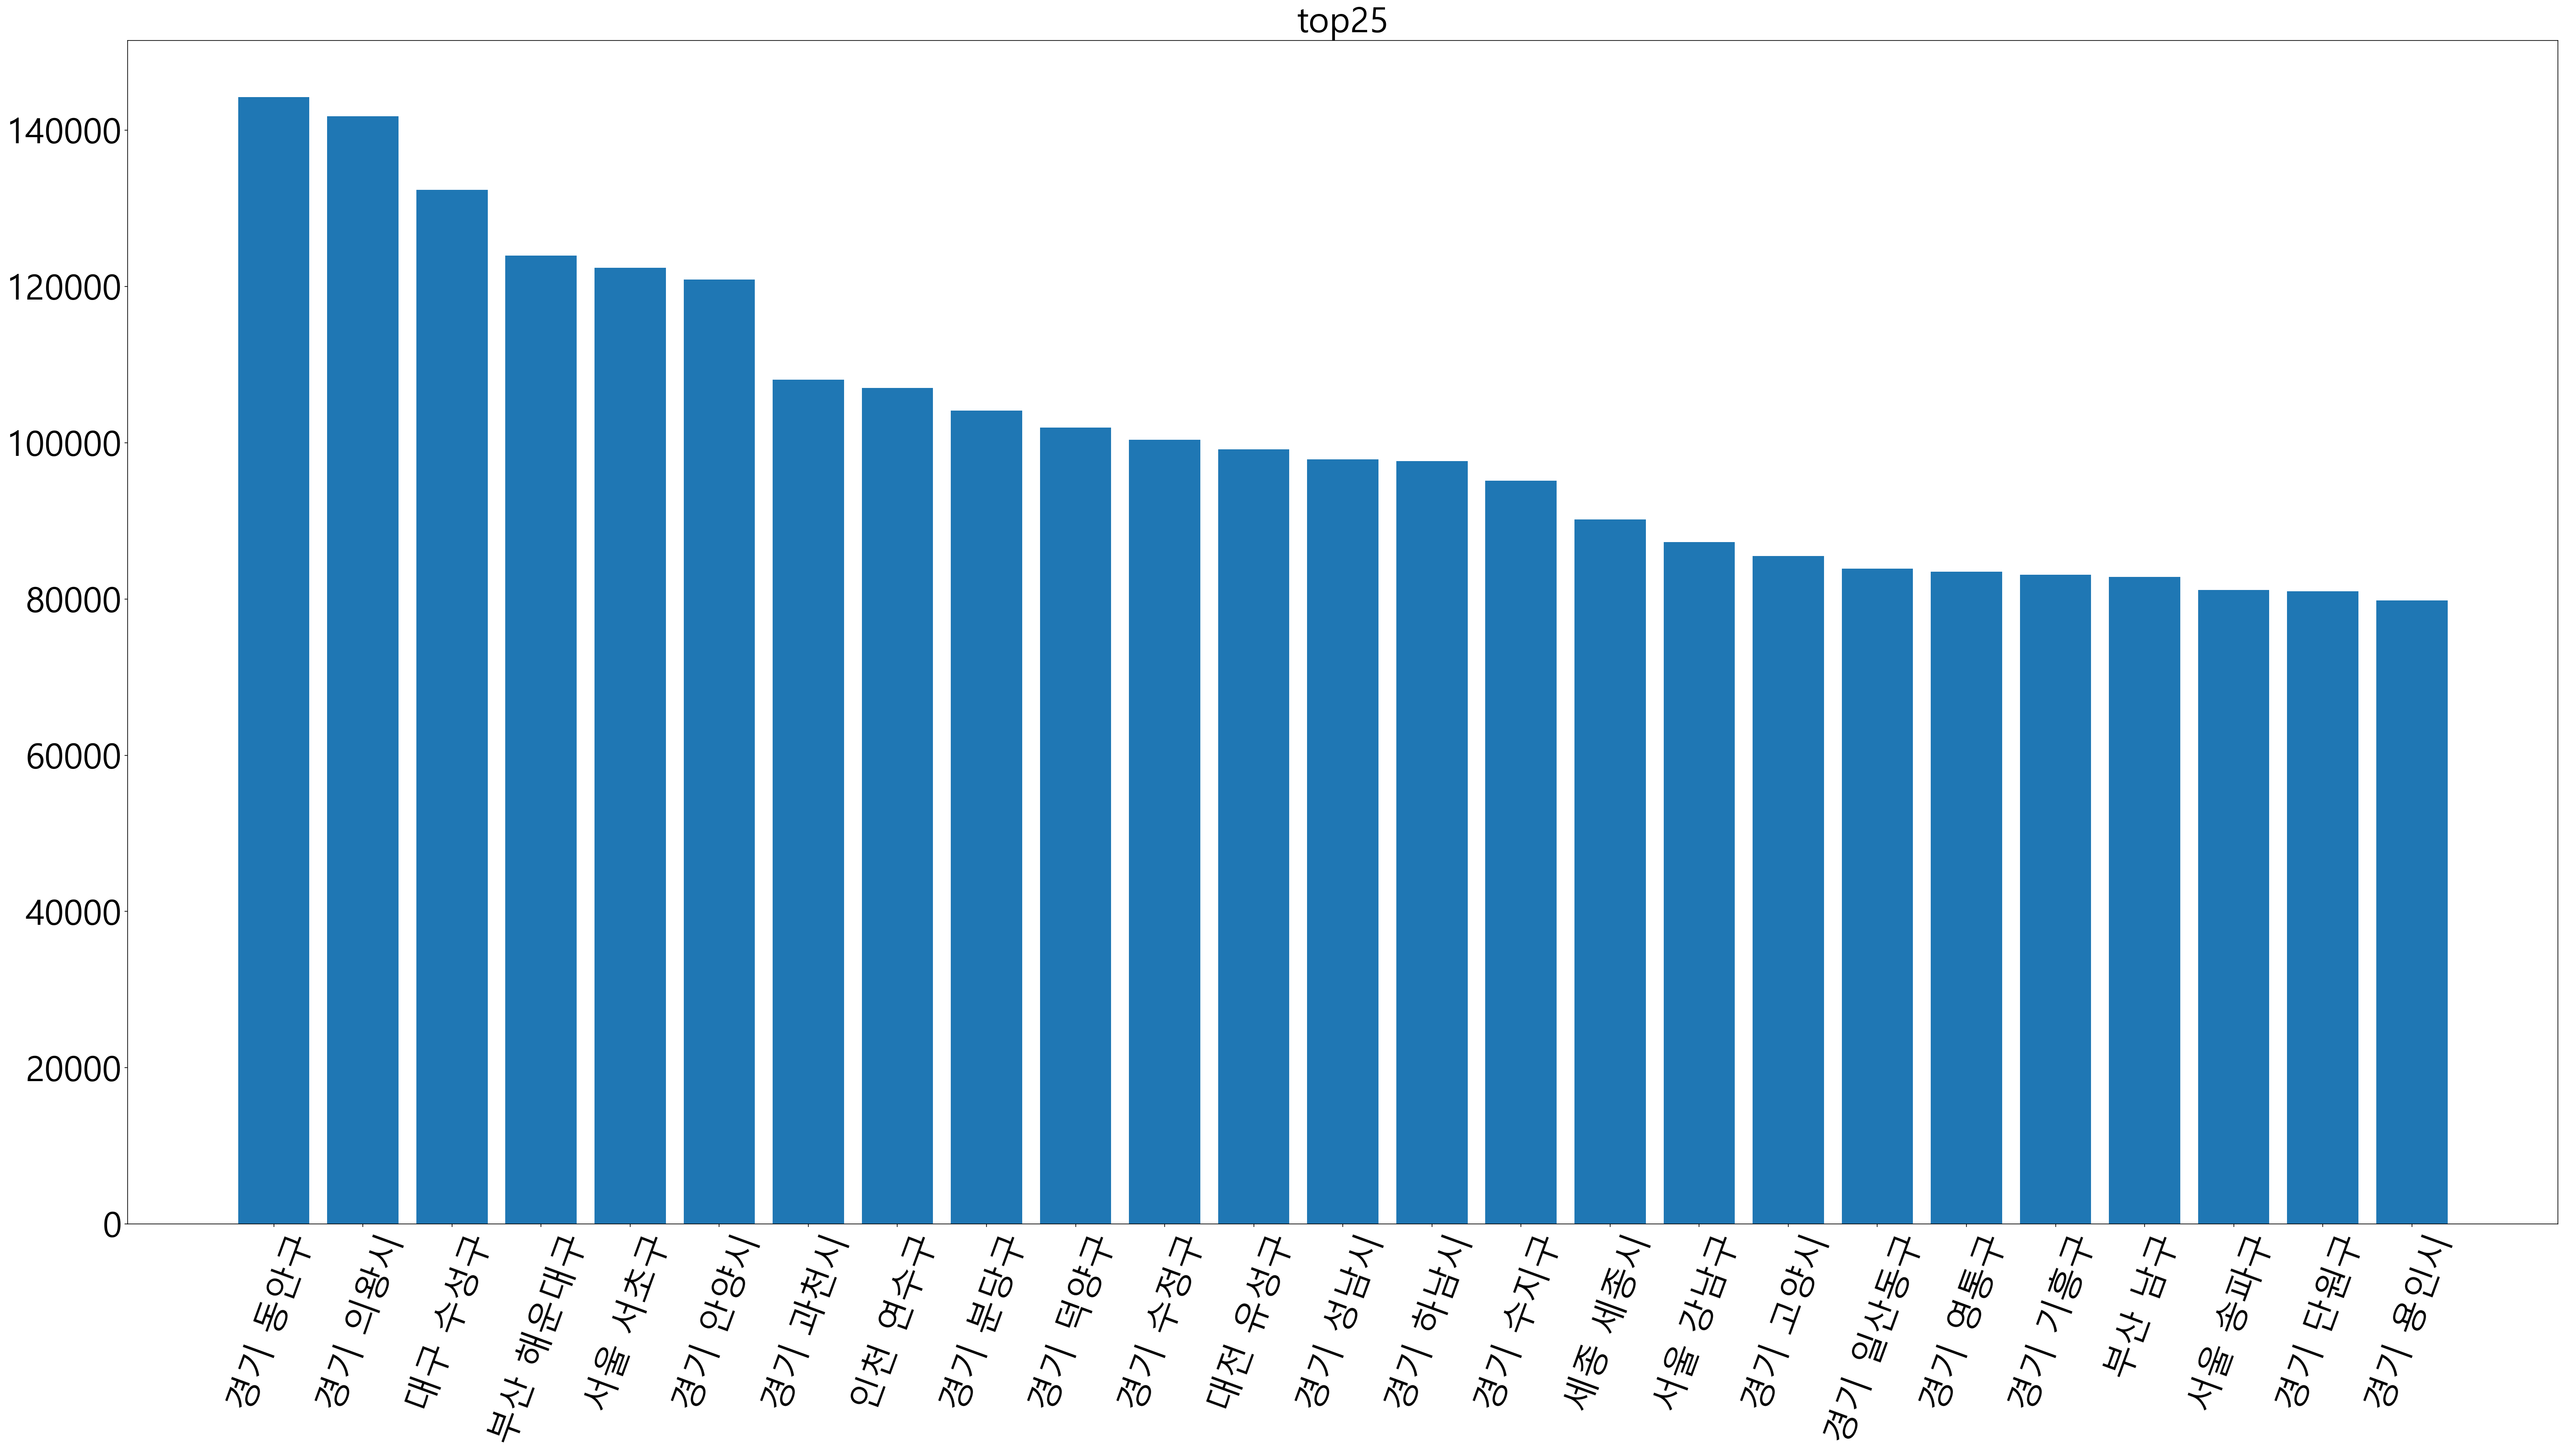

In [138]:
# 차트 그리기
plt.figure(figsize=(50, 25))
plt.bar(tmp['시도']+' '+tmp['구군'],tmp['증가액'])
plt.xticks(rotation=70)
plt.xticks(fontsize =40)
plt.yticks(fontsize =40)
plt.title('top25',fontsize=40)
plt.show()




**3) 가격 변동 BOTTOM 25**

- 증가액 기준으로 하위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [139]:
# 가격 변동 BOTTOM 25
tmp = apart2.sort_values(by='증가액',ascending=True).head(25)
tmp.reset_index(drop=True,inplace=True)

# 확인
tmp

,시도,구군,증가액,증가율
0,충남,당진시,-5264,-3.192857
1,경남,사천시,-3527,-2.785500
2,부산,중구,-2645,-1.795253
3,전남,무안군,-2588,-1.326411
4,전남,목포시,-2396,-1.624021
5,전남,나주시,-1188,-0.714629
6,경북,문경시,-550,-0.389381
7,경북,영천시,-93,-0.091874
8,강원,태백시,-42,-0.053589
9,전북,남원시,486,0.345330


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

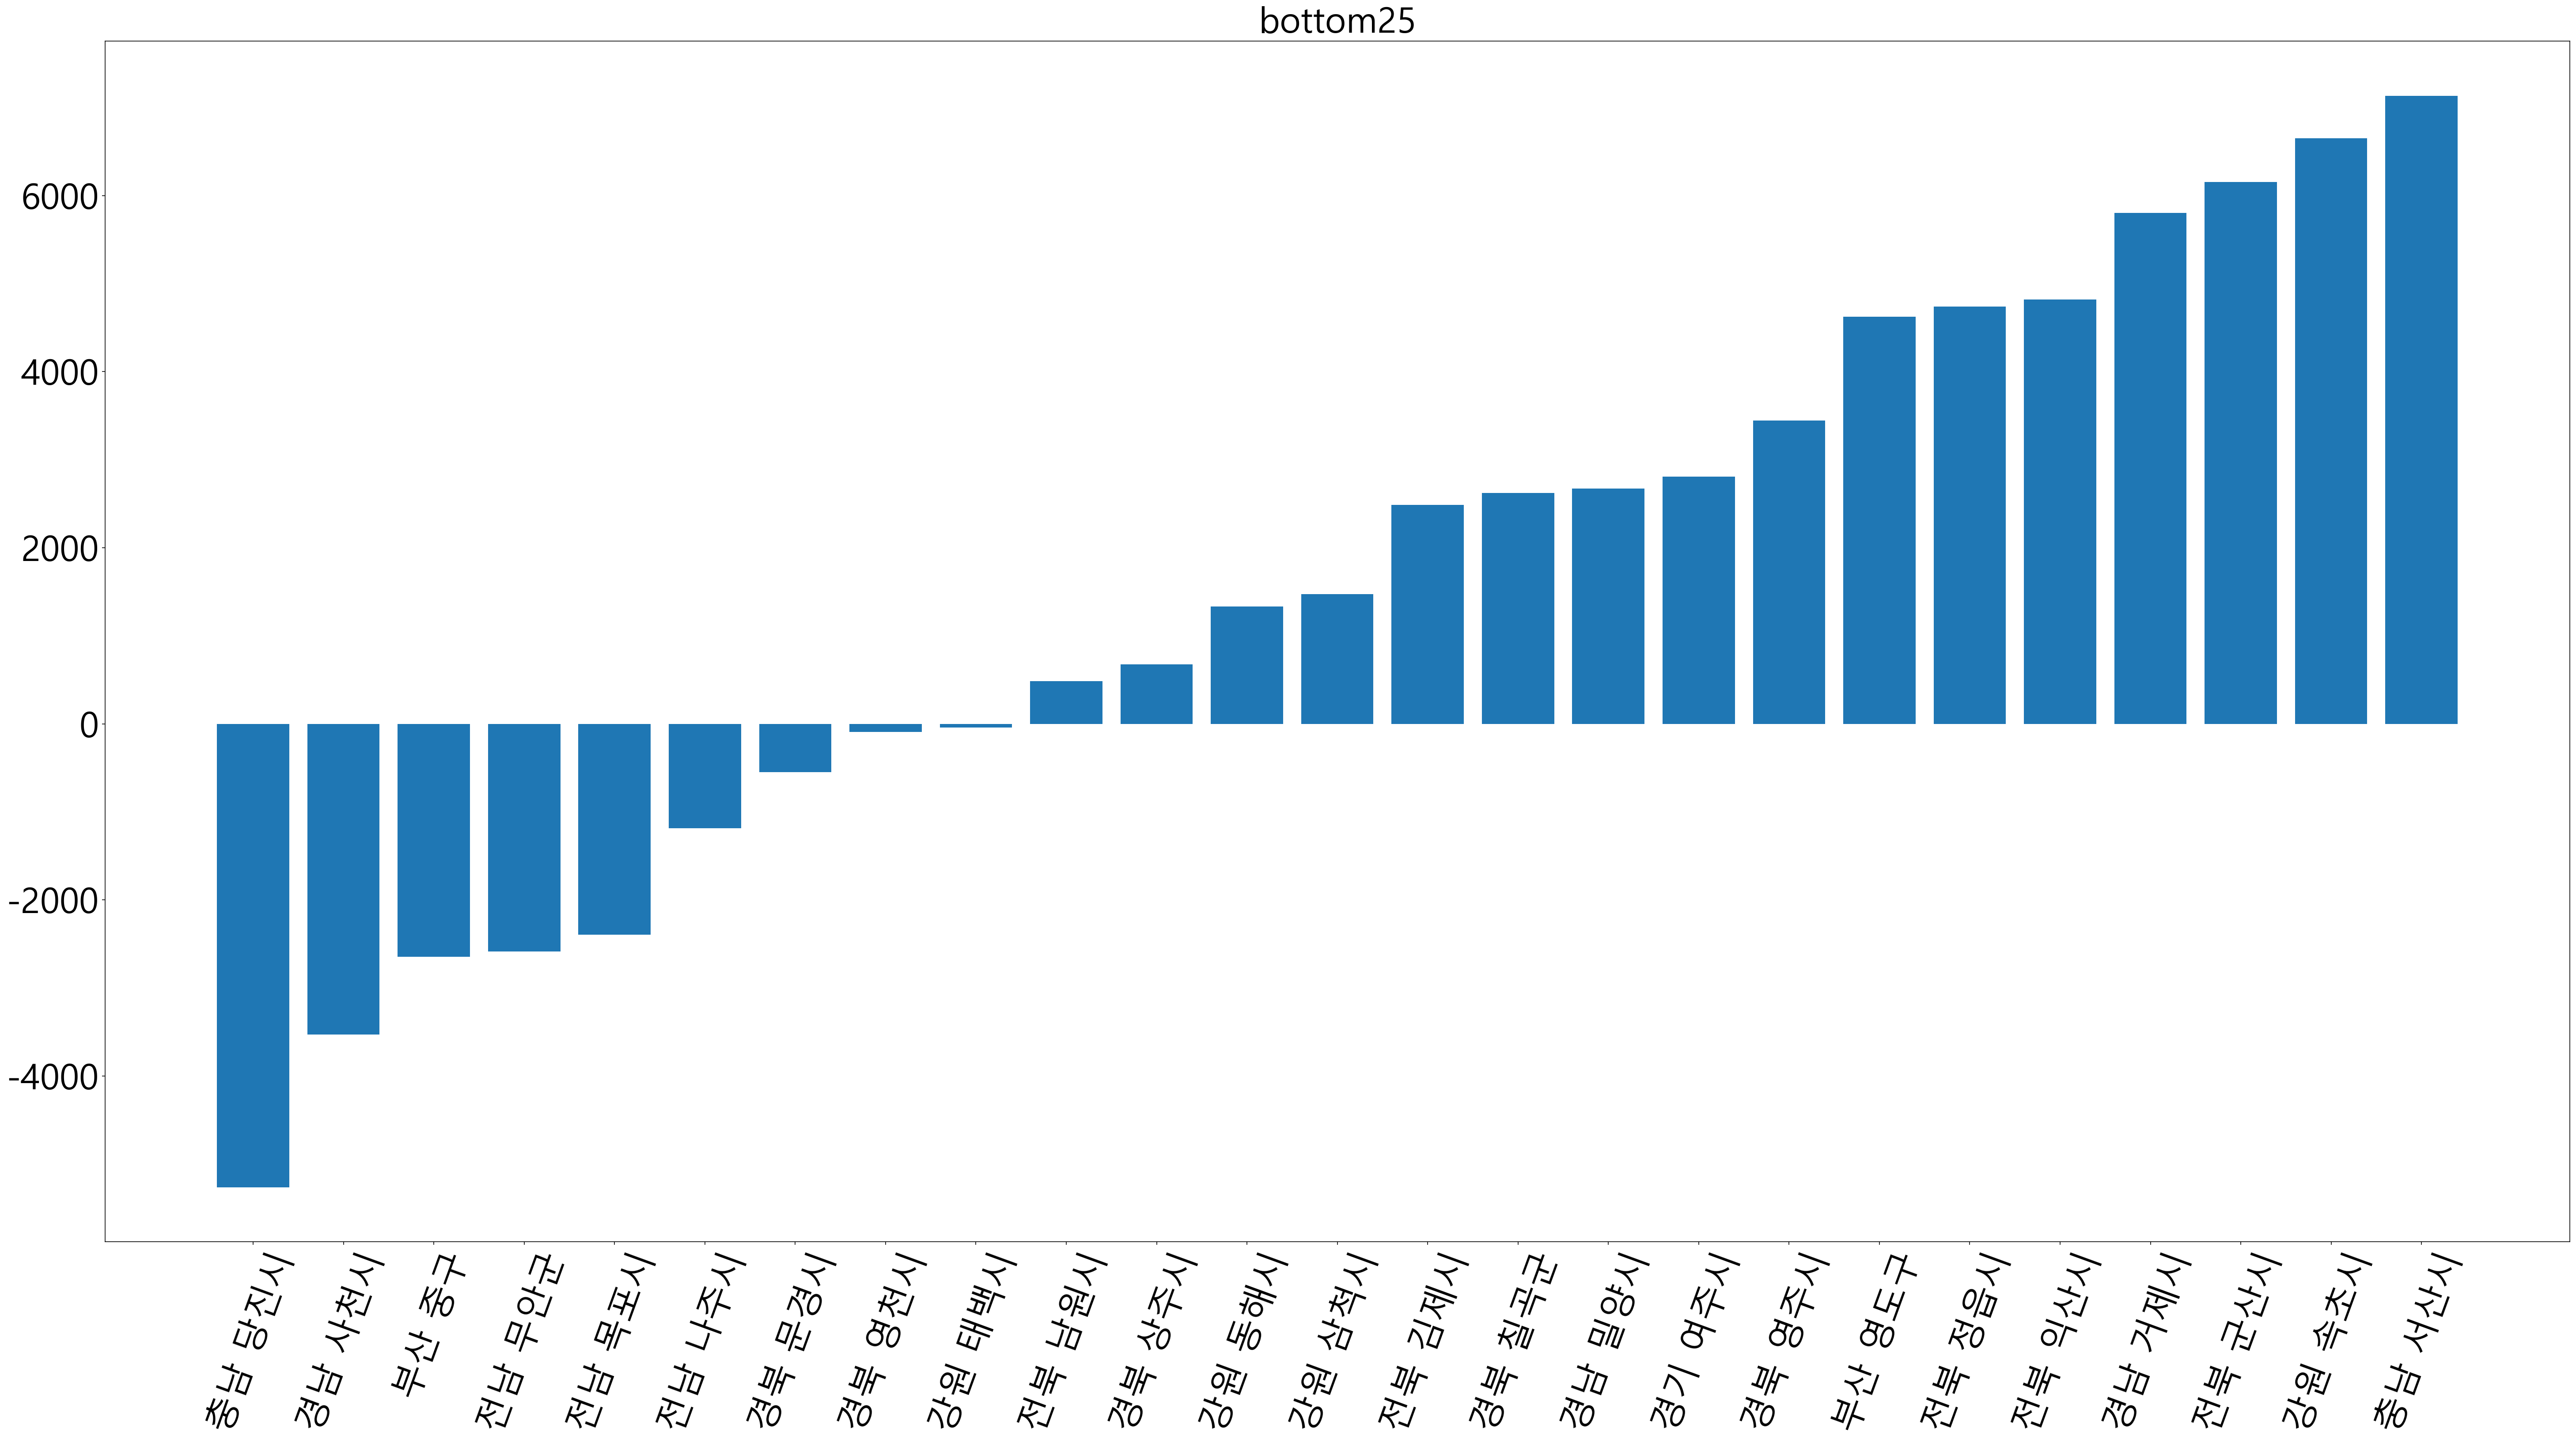

In [140]:
# 차트 그리기
plt.figure(figsize=(50, 25))
plt.bar(tmp['시도']+' '+tmp['구군'],tmp['증가액'])
plt.xticks(rotation=70)
plt.xticks(fontsize =40)
plt.yticks(fontsize =40)
plt.title('bottom25',fontsize=40)
plt.show()




### 4.2.ㅇㅇ 지역 분석

**1) ㅇㅇ 지역 데이터 추출**

- apart2 데이터프레임에서 ㅇㅇ지역 데이터만 추출해 새로운 데이터프레임을 선언합니다.

In [141]:
# 데이터프레임 만들기
daejeon = apart2[apart2['시도']=='대전']

# 확인
daejeon

,시도,구군,증가액,증가율
107,대전,동구,29261,11.170623
108,대전,중구,30184,12.572947
109,대전,서구,52915,16.268174
110,대전,유성구,99153,23.851540
111,대전,대덕구,28917,14.991835


**2) ㅇㅇ 지역 가격 변동 현황**

- ㅇㅇ 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

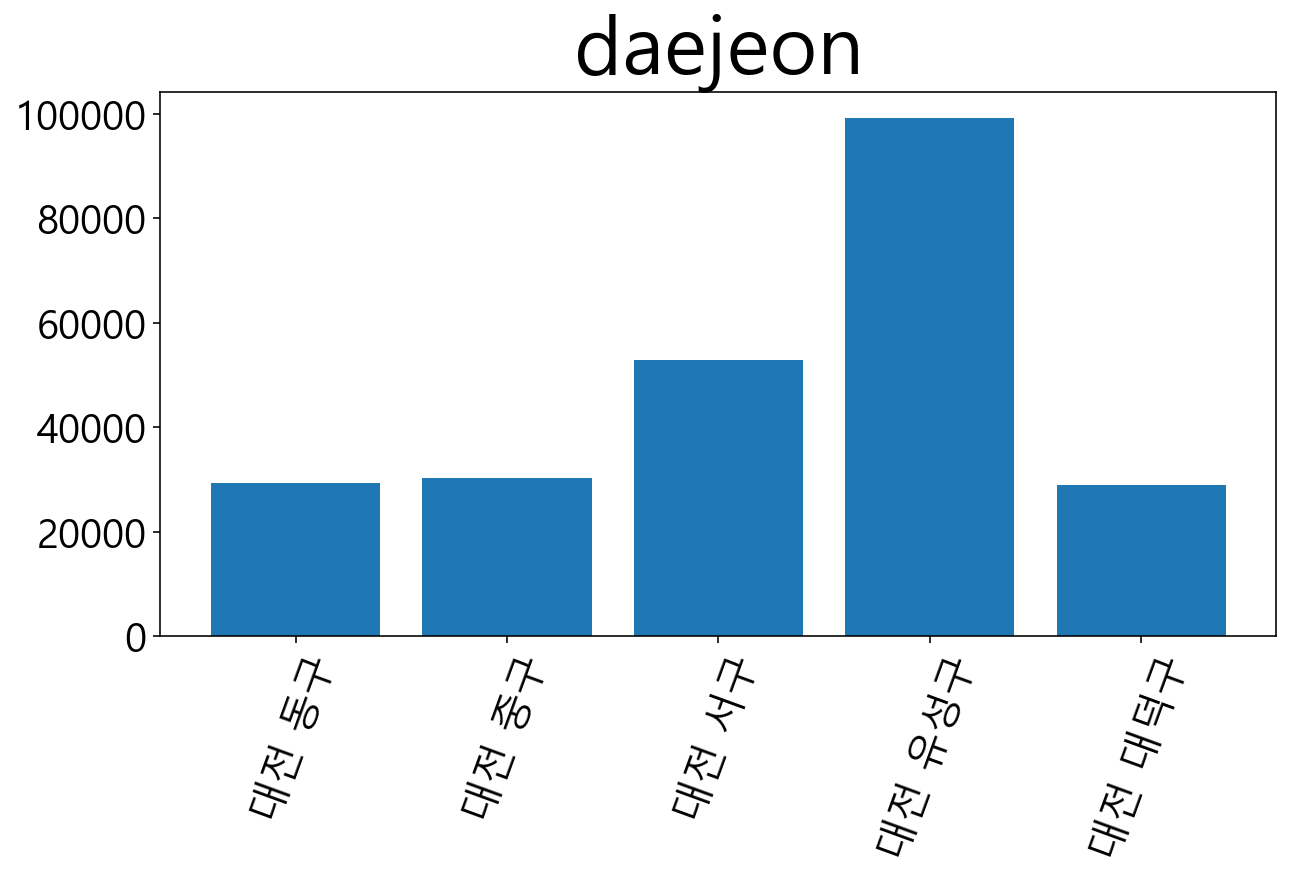

In [142]:
# ㅇㅇ 지역 가격 변동
plt.figure(figsize=(10, 5))
plt.bar(daejeon['시도']+' '+daejeon['구군'],daejeon['증가액'])
plt.xticks(rotation=70)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.title('daejeon',fontsize=40)
plt.show()


**3) ㅇㅇ 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp 데이터프레임을 선언합니다.
- tmp 데이터프레임을 대상으로 다시 시각화해 확인합니다.

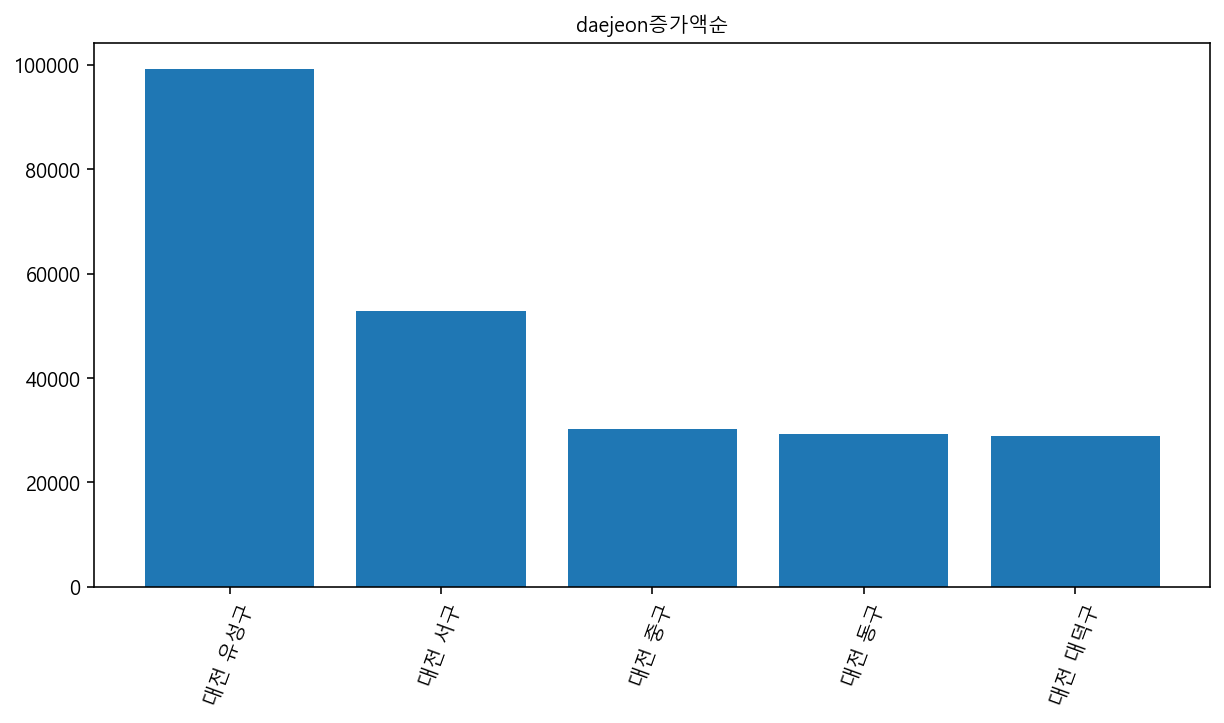

In [143]:
# ㅇㅇ 지역 가격 변동 순위
tmp = daejeon.sort_values(by='증가액',ascending=False)
tmp
# 시각화
plt.figure(figsize=(10, 5))
plt.bar(tmp['시도']+' '+tmp['구군'],tmp['증가액'])
plt.xticks(rotation=70)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)
plt.title('daejeon증가액순',fontsize=10)
plt.show()




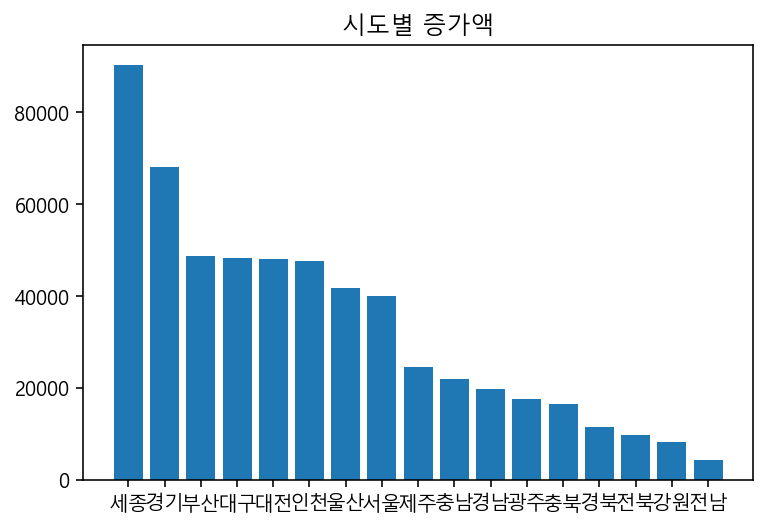

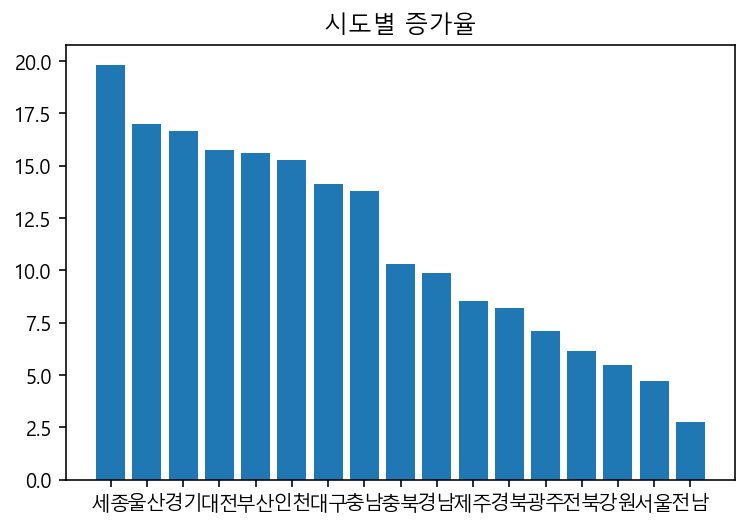

In [144]:
#시도별 증가액/증가율
tmp2 = apart2.groupby('시도',as_index=False)['증가액'].mean()
tmp2.sort_values(by='증가액',ascending=False,inplace=True)
plt.bar(tmp2['시도'],tmp2['증가액'])
plt.title('시도별 증가액')
plt.show()

tmp3 = apart2.groupby('시도',as_index=False)['증가율'].mean()
tmp3.sort_values(by='증가율',ascending=False,inplace=True)
plt.bar(tmp3['시도'],tmp3['증가율'])
plt.title('시도별 증가율')
plt.show()

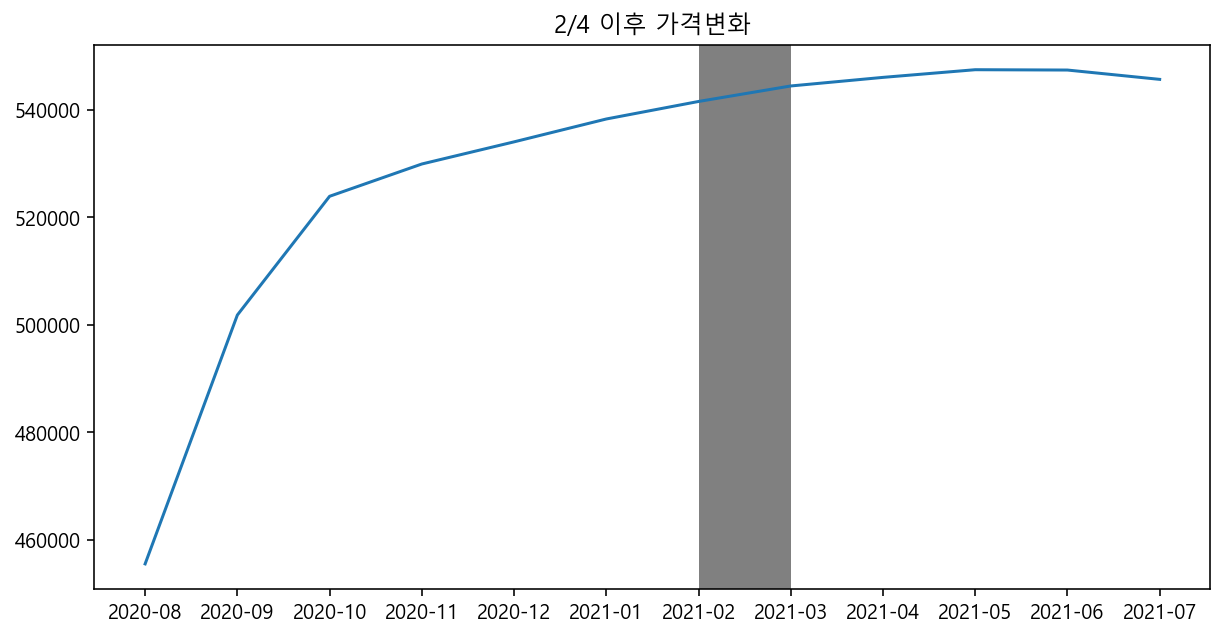

In [153]:
#2021.2.4 부동산 정책이후 서울지역 가격변화
s = apt[apt['시도']=='세종']
s.drop(['증가액','증가율'], axis=1, inplace=True)
t = s.describe().loc['mean',:]
plt.figure(figsize=(10, 5))
plt.plot(t)
plt.title('2/4 이후 가격변화')
plt.axvspan('2021-02', '2021-03', facecolor='gray', alpha=1)
plt.show()


## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

-  top25를 보면 경기, 서울 지역의 비중이 높다. 
-  가격변동 bottom25를 보면 대부분이 사람이 많이 살지 않는 지역으로 구성되며 매매가 적어 가격변동도 적은 것으로 유추했다.
-  시도별 증가율을 조사한 결과 세종, 경기가 가장 높은 비율로 증가하였고 의외로 서울은 뒤에서 두번째를 기록하였다. 이미 가격이 높아 증가율은 높지 않은 것으로 추정된다.
-  2/4일 주택공급 대책이후 가격변화 추세는 변하지 않은 것으로 파악된다.

**2) 기타**

- 증가액과 증가율을 모두 보았을 때 세종, 경기 지역의 집값이 가장 크게 폭등하였다. 
- 특히 세종은 모든 부분 1등을 기록하였는데 2/4일 정책이후 세종지역만 상승폭이 작아지는 경향을 보였다.
- 다른 지역은 정책이후 상승폭이 거의 변하지 않았다. 오히려 상승한 지역이 대부분이었다.
- 대부분 증가폭의 수혜는 대도시와 근교만이 받았다.
